In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from logistic_regression import LogisticRegressionGD
from extrapolation import *
from experiments import Experiment, RestartingExperiment

In [3]:
data = pd.read_csv("../../../sonar.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
X = data.loc[:, data.columns[:-1]].values
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
y = data.loc[:, data.columns[-1]]
y = np.where(y == "R", 1, -1)

X = torch.tensor(X)
y = torch.tensor(y)

X.shape, y.shape

(torch.Size([208, 61]), torch.Size([208]))

In [5]:
np.random.seed(2020)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [6]:
model = LogisticRegressionGD(X_train, y_train, 1e-2)

In [7]:
model.fit(1e-4, max_iter=1000000)

In [8]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.8095, dtype=torch.float64)

In [9]:
len(model.log)

24701

## k test

In [18]:
ks = [2, 3, 5, 10, 20, 30]
methods = [
    ("RRE+QR", RRE, lambda k: k, lambda k: {"qr": True}),
    ("RNA", regularized_RRE, lambda k: k, lambda k: {"lambda_": 1e-10}),
    ("RNA-small_lambda", regularized_RRE, lambda k: k, lambda k: {"lambda_": 1e-15}),
    ("VEA", vector_epsilon_v1, lambda k: 2*k, lambda k: {"k": k}),
    ("VLT", levin_transform, lambda k: k+1, lambda k: {"k": k, "type": "t"}),
    ("VLU", levin_transform, lambda k: k+1, lambda k: {"k": k, "type": "u"}),
]

In [19]:
experiment = Experiment(model.log, model.obj, values=model.value_log)

In [20]:
for k in ks:
    for name, method, k_fun, method_kwargs_fun in methods:
        name = f"{name}-{k}"
        print(name)
        experiment.run_method(name, method, k_fun(k), method_kwargs=method_kwargs_fun(k))

RRE+QR-2
RNA-2
RNA-small_lambda-2
VEA-2
VLT-2
VLU-2
RRE+QR-3
RNA-3
RNA-small_lambda-3
VEA-3
VLT-3
VLU-3
RRE+QR-5
RNA-5
RNA-small_lambda-5
VEA-5
VLT-5
VLU-5
RRE+QR-10
RNA-10
RNA-small_lambda-10
VEA-10
VLT-10
VLU-10
RRE+QR-20
RNA-20
RNA-small_lambda-20
VEA-20
VLT-20
VLU-20
RRE+QR-30
RNA-30
RNA-small_lambda-30
VEA-30
VLT-30


/home/michal/magister/rna/notebooks/logistic regression/../../extrapolation.py:291: RuntimeWarning: divide by zero encountered in true_divide
  c = c * (c + i) ** (i - 1) / (c + i + 1) ** i
/home/michal/magister/rna/notebooks/logistic regression/../../extrapolation.py:294: RuntimeWarning: invalid value encountered in multiply
  return s[1:] - c[:, None] * s[:-1]


VLU-30


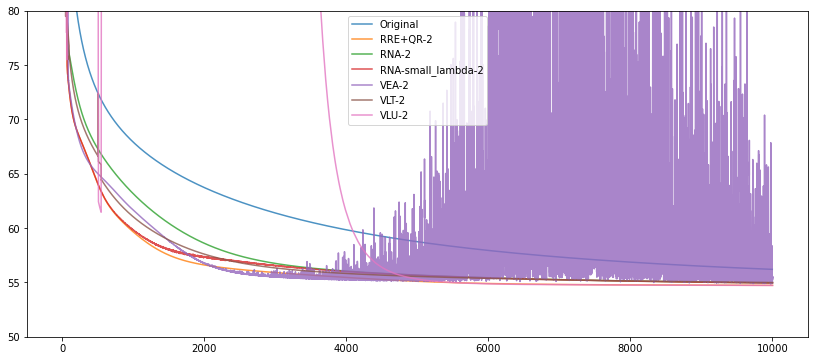

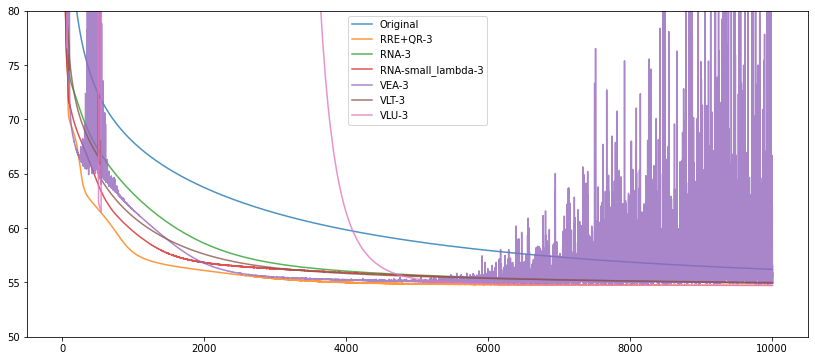

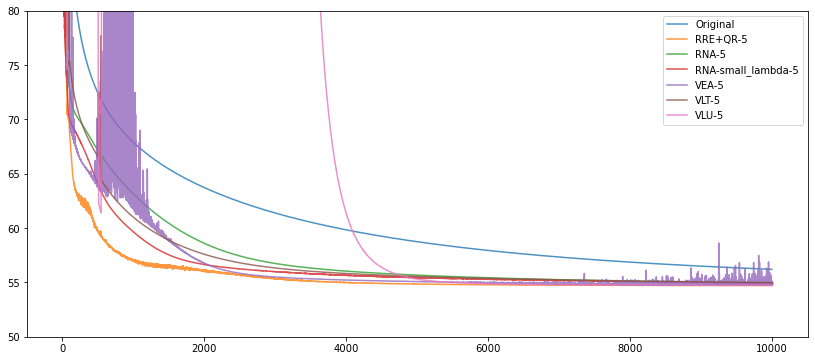

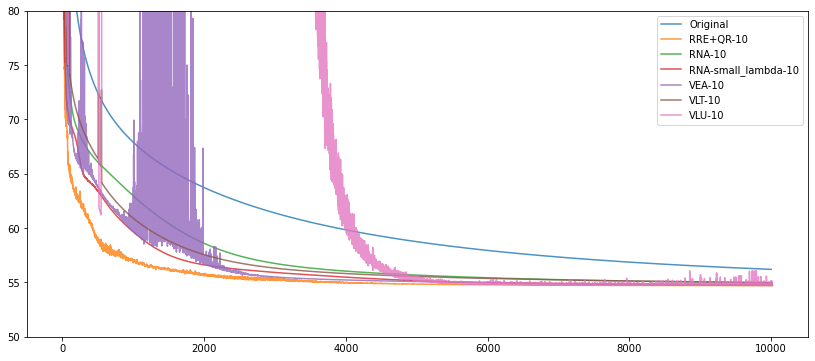

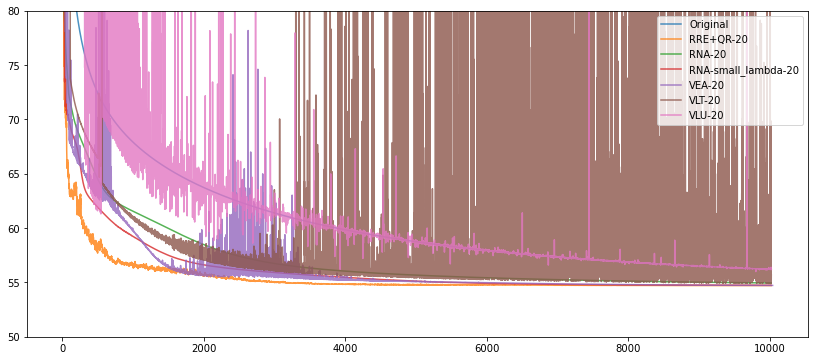

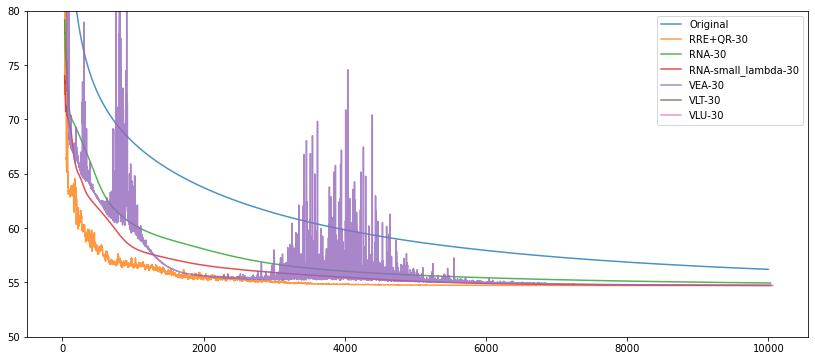

In [21]:
for k in ks:
    plt.figure(figsize=(14, 6))
    plot_methods = [f"{method[0]}-{k}" for method in methods]
    experiment.plot_values(n=10000, methods=plot_methods)
    plt.ylim(50, 80)
    plt.legend()
    plt.show()
        

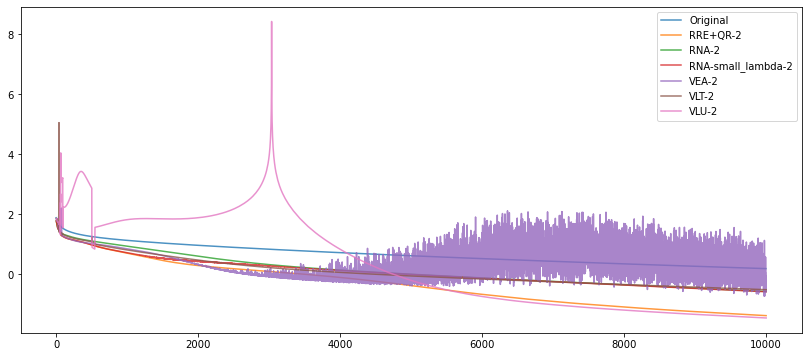

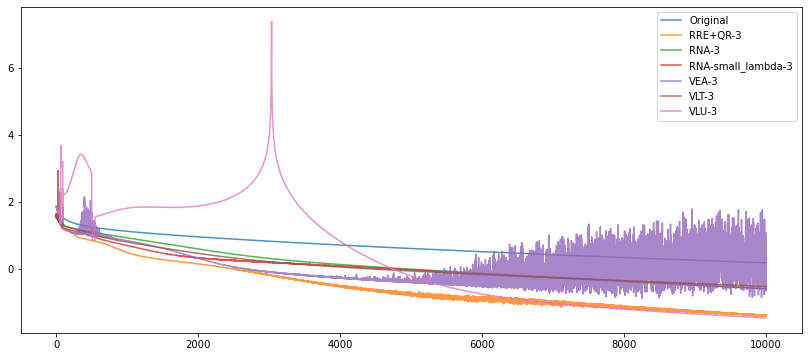

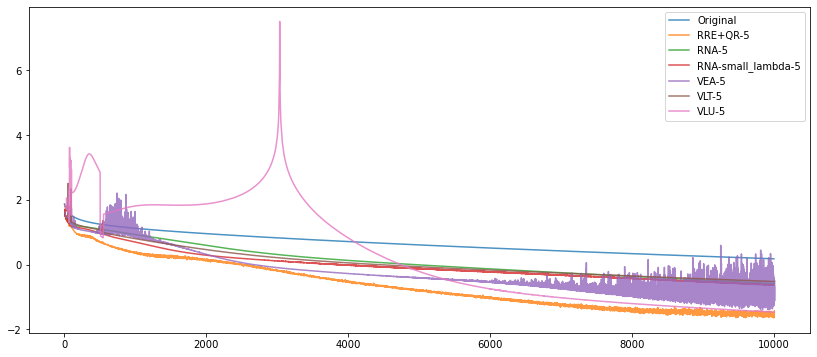

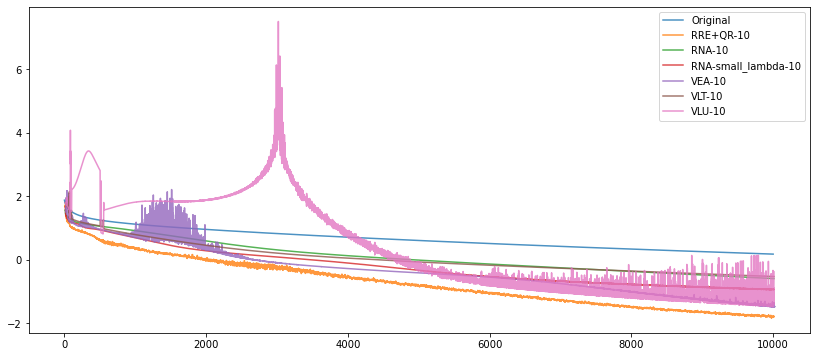

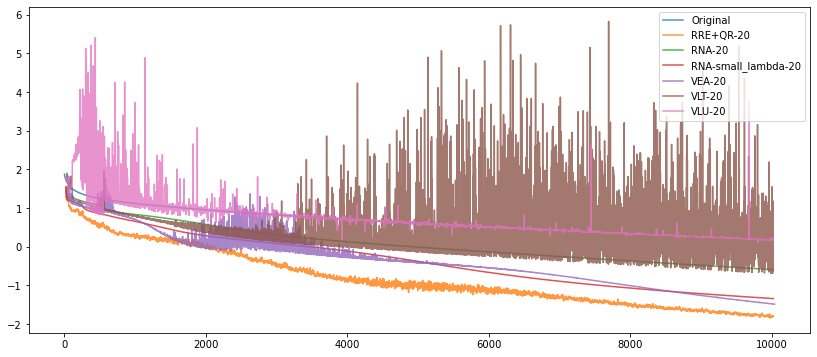

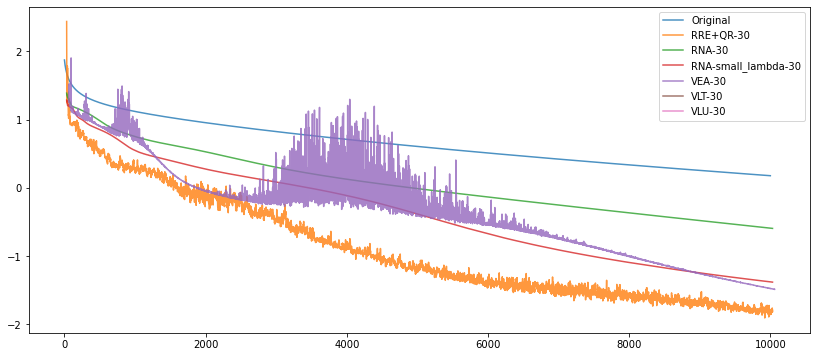

In [22]:
for k in ks:
    plt.figure(figsize=(14, 6))
    plot_methods = [f"{method[0]}-{k}" for method in methods]
    experiment.plot_log_diff(n=10000, methods=plot_methods)
    plt.legend()
    plt.show()
        

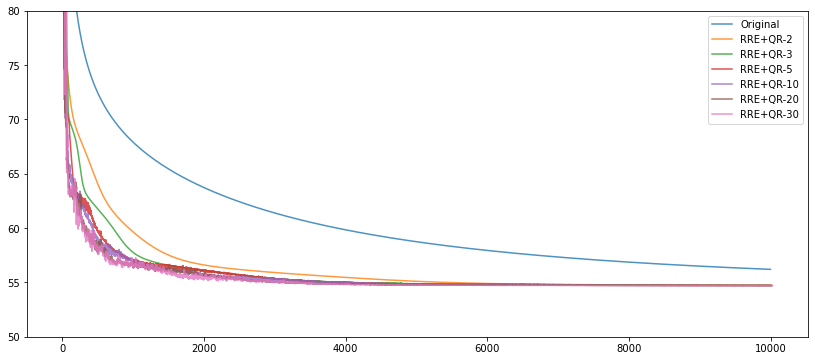

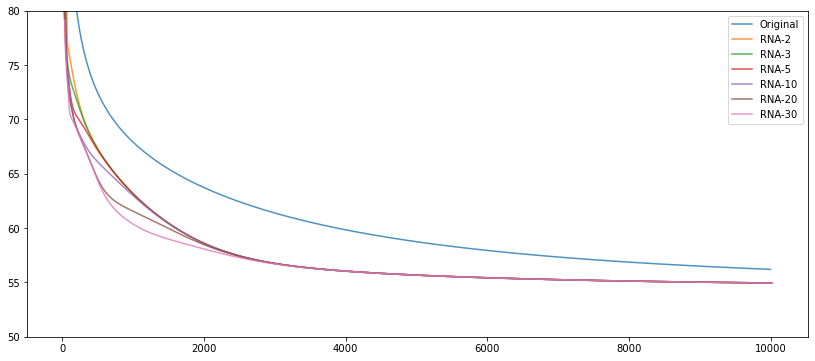

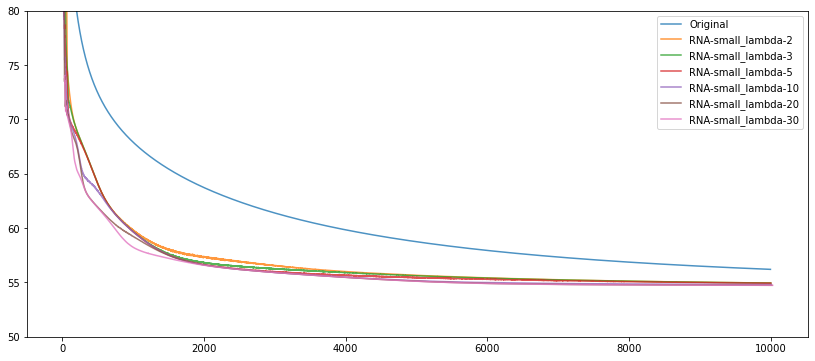

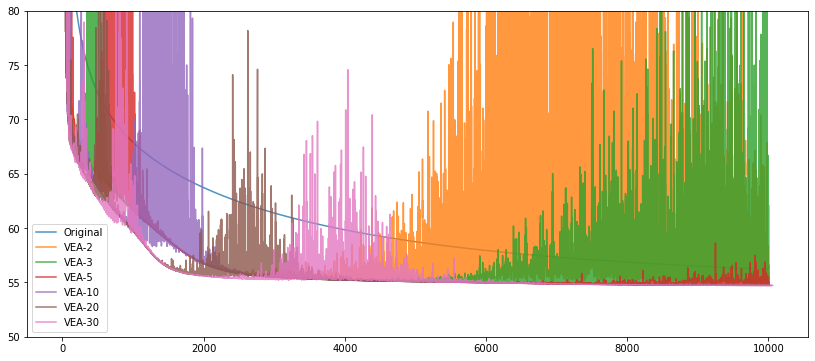

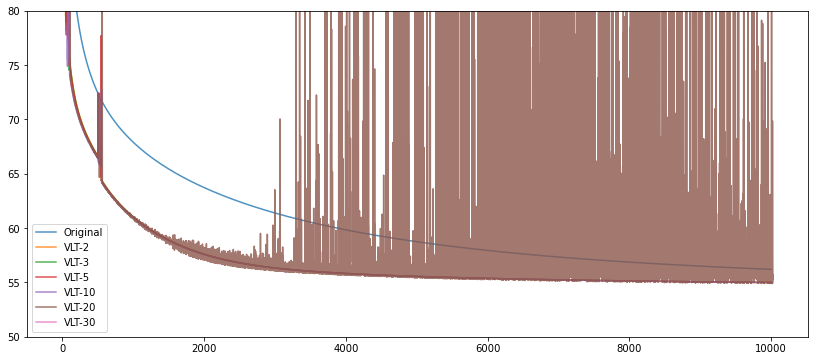

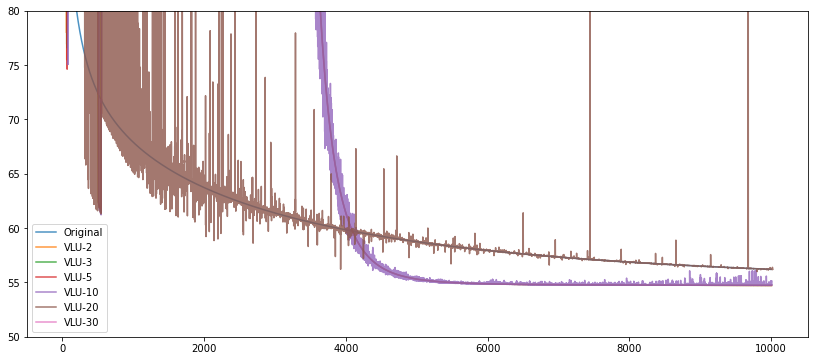

In [23]:
for method in methods:
    plt.figure(figsize=(14, 6))
    plot_methods = [f"{method[0]}-{k}" for k in ks]
    experiment.plot_values(n=10000, methods=plot_methods)
    plt.ylim(50, 80)
    plt.legend()
    plt.show()
        

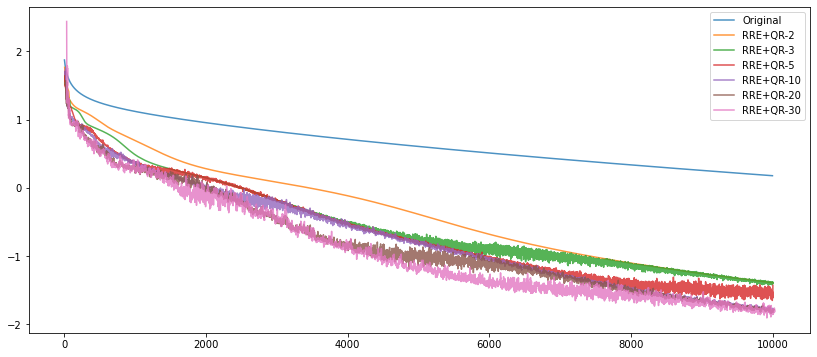

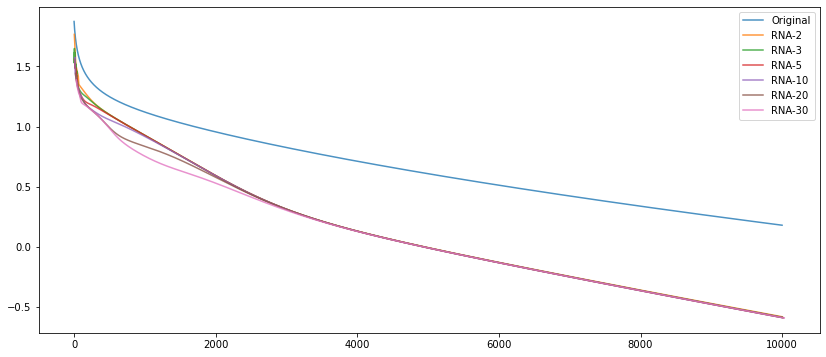

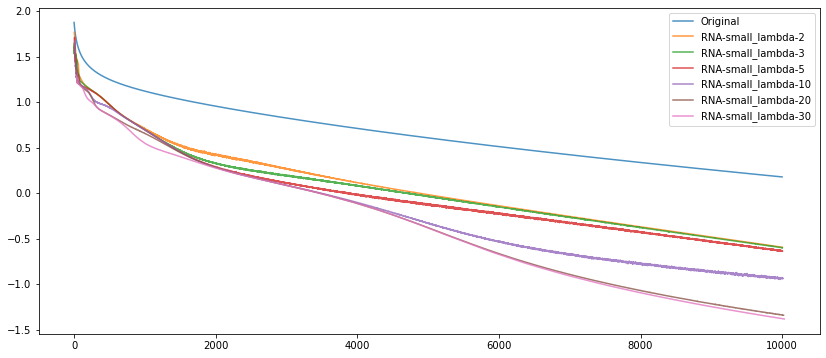

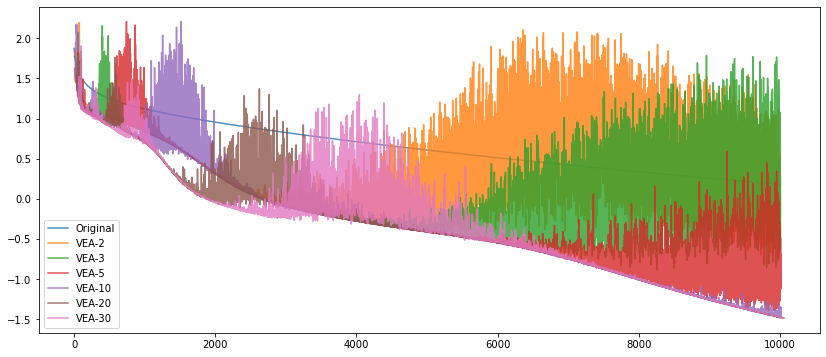

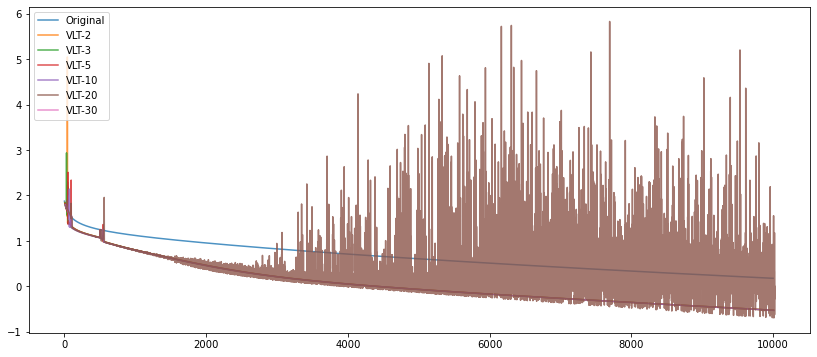

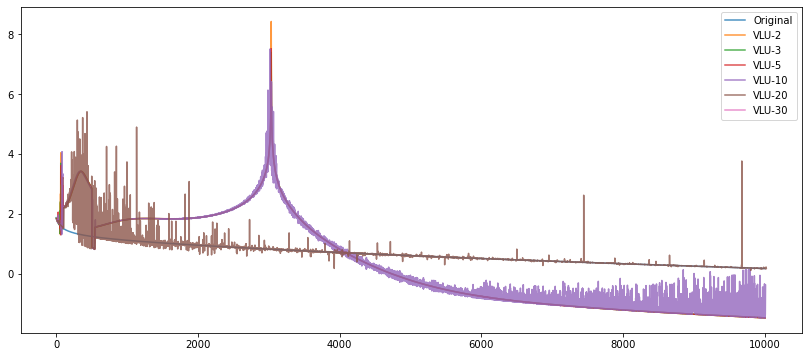

In [24]:
for method in methods:
    plt.figure(figsize=(14, 6))
    plot_methods = [f"{method[0]}-{k}" for k in ks]
    experiment.plot_log_diff(n=10000, methods=plot_methods)
    plt.legend()
    plt.show()
        

In [25]:
df = experiment.value_df()
df.to_csv("results/sonar-k-test.csv")

## lambda test

In [32]:
experiment = Experiment(model.log, model.obj, values=model.value_log)

In [33]:
for lambda_ in np.geomspace(1e-1, 1e-20, 20):
    experiment.run_method(f"RNA-{lambda_:.0e}", regularized_RRE, 6, method_kwargs={"lambda_": lambda_})

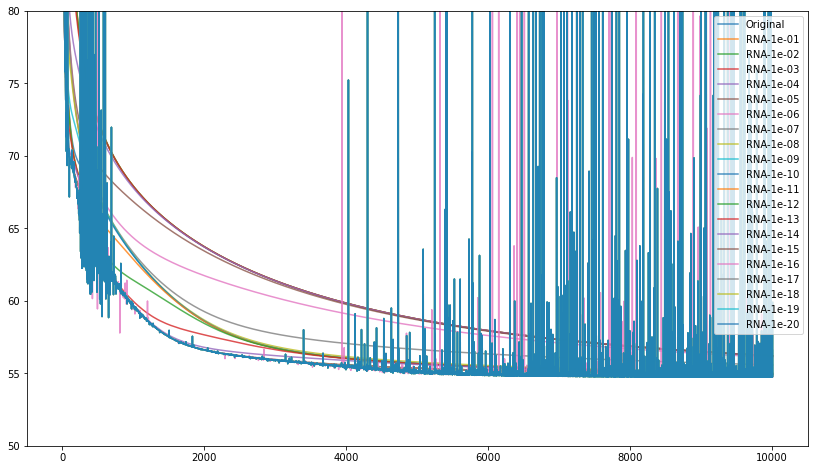

In [34]:
plt.figure(figsize=(14, 8))
experiment.plot_values(n=10000)
plt.ylim(50, 80)
plt.legend()

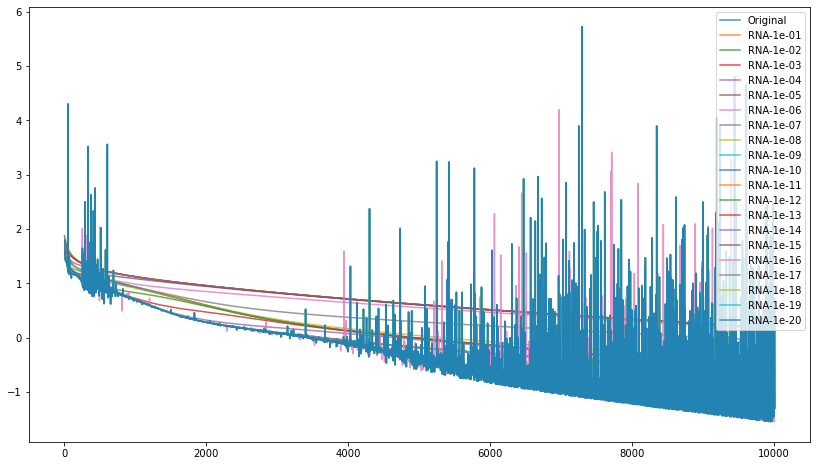

In [37]:
plt.figure(figsize=(14, 8))
experiment.plot_log_diff(n=10000)
plt.legend()

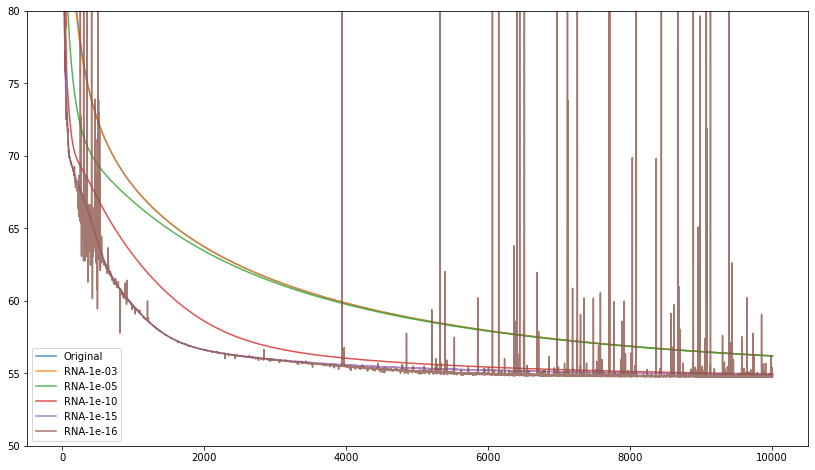

In [55]:
plt.figure(figsize=(14, 8))
experiment.plot_values(n=10000, methods=[f"RNA-{c:.0e}" for c in [1e-3, 1e-5, 1e-10, 1e-15, 1e-16]])
plt.ylim(50, 80)
plt.legend()

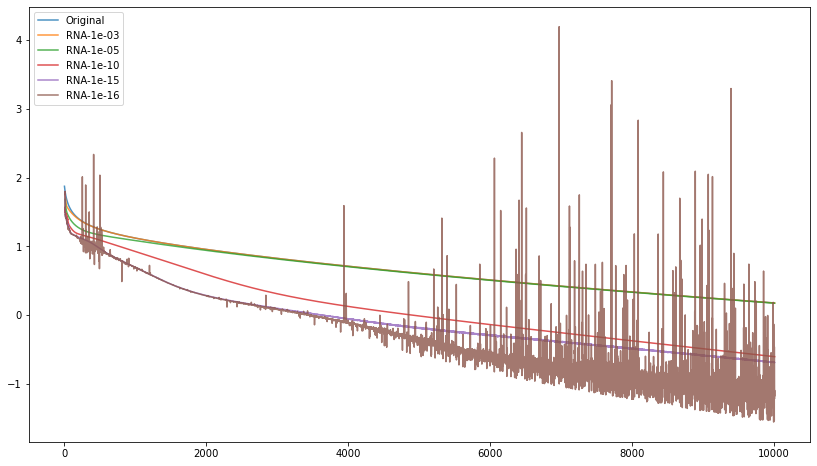

In [57]:
plt.figure(figsize=(14, 8))
experiment.plot_log_diff(n=10000, methods=[f"RNA-{c:.0e}" for c in [1e-3, 1e-5, 1e-10, 1e-15, 1e-16]])
plt.legend()

In [35]:
df = experiment.value_df()
df.to_csv("results/sonar-lambda-test.csv")